## Visualization of classification boundaries

#### Adapted from https://www.kaggle.com/arthurtok/decision-boundaries-visualised-via-python-plotly

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_checkerboard
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# 1. Decision Boundary of Two Classes

1. Before we start on the Iris dataset, as a starter I would like to generate some custom data points so we can have a feel for how the decision boundaries would look like on a two-class dataset (since the Iris set is a three-class set). To do this, we can call Sklearn's very convenient internal datasets by invoking -   **sklearn.datasets** to create datasets in the shapes of circles (make_circles()), crescents (make_moon( ) ) and blobs (make_blobs( ) ) as follows:

In [3]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

datasets = [make_moons(noise=0.3, random_state=0)
            ,make_circles(noise=0.2, factor=0.5, random_state=1)
            ,make_blobs()
           ]

### Tree-based Decision Boundaries

Let us first take a look at tree-based decision boundaries, specifically for these three models : the basic Decision tree, the Random Forest and the Extra Trees classifier. 

In [4]:
names = ["Decision Tree","Random Forest", "ExtraTrees"]
# Creating a Python List with our three Tree classifiers
treeclassifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=20, max_features=1),
    ExtraTreesClassifier()]

**Plotting the Decision Surface**

The best site to obtain Python code for plotting decision surfaces can be found on the Sklearn website. There are multiple excellent examples on the site and here are some links that you may find useful:

 1. [Classifier Comparison][1] 

 2. [Plot the Decision Boundaries of a Voting Classifier][2]

  [1]: http://scikit-learn.org/0.15/auto_examples/plot_classifier_comparison.html
  [2]: http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

When plotting a decision surface, the general layout of the Python code is as follows:

 - Define an area with which to plot our decision surface and boundaries. We will use a very handy Numpy method **meshgrid** for this task
 - Extract either the class probabilities by invoking the attribute "predict_proba" or the distances between boundaries via the attribute "decision_function"

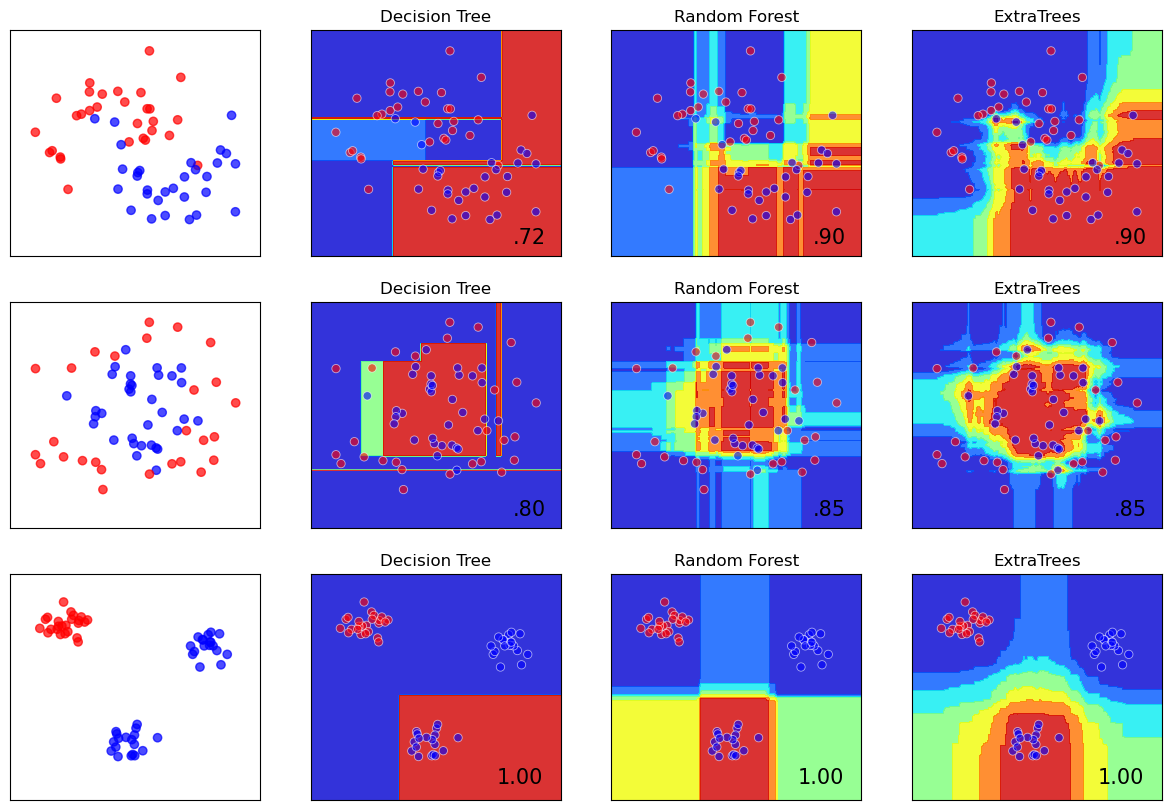

In [5]:
figure = plt.figure(figsize=(12, 10))
h = 0.02
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.jet
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(treeclassifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
    # and testing points
    #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, treeclassifiers):
        ax = plt.subplot(len(datasets), len(treeclassifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
        # and testing points
        #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   #alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

**Takeaway from the Plots**

As we can see, our tree-based models are able to capture non-linear boundaries as evinced by the jagged edges and kinks in the decision boundaries to take into account the moon and circle shapes of the custom data-points. Furthermore, we can see that these tree-based models have been able to segregate the data points sufficiently based on a visual inspection of the Decision boundaries where there is clear demarcation between the red and the blue points. 

### Linear vs Non-Linear Decision Boundaries

Let us now plot some decision boundaries of linear models namely a Linear Support Vector Machine, a logistic regression and a Naive Bayes model and we observe how their decision boundaries differ from the tree-based models.

In [6]:
names = ["SVC","LogisticRegression", "GaussianNB"]
linearclassifiers = [
    SVC(kernel="linear", C=0.025),
    LogisticRegression(),
    GaussianNB()]

In [7]:
names = ["SVC-Lin","SVC-RBF", "GaussianNB"]
linearclassifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(kernel="rbf", C=0.025),
    GaussianNB()]

In [8]:
names = ["SVC-RBF1","SVC-RBF2", "SVC-RBF3"]
linearclassifiers = [
    SVC(kernel="rbf", C=0.00025),
    SVC(kernel="rbf", C=0.025),
    SVC(kernel="rbf", C=2.5)]

In [9]:
names = ["RandomForest1","RandomForest2", "RandomForest3"]
linearclassifiers = [
    RandomForestClassifier(max_depth=4, n_estimators=20, random_state=0),
    RandomForestClassifier(max_depth=4, n_estimators=10, random_state=0),
    RandomForestClassifier(max_depth=50, n_estimators=5, random_state=0)]


In [10]:
datasets = [make_moons(noise=0.3, random_state=0)
            ,make_circles(noise=0.2, factor=0.5, random_state=1) 
            ,make_circles(noise=0.01, factor=0.5, random_state=1) 
           ]

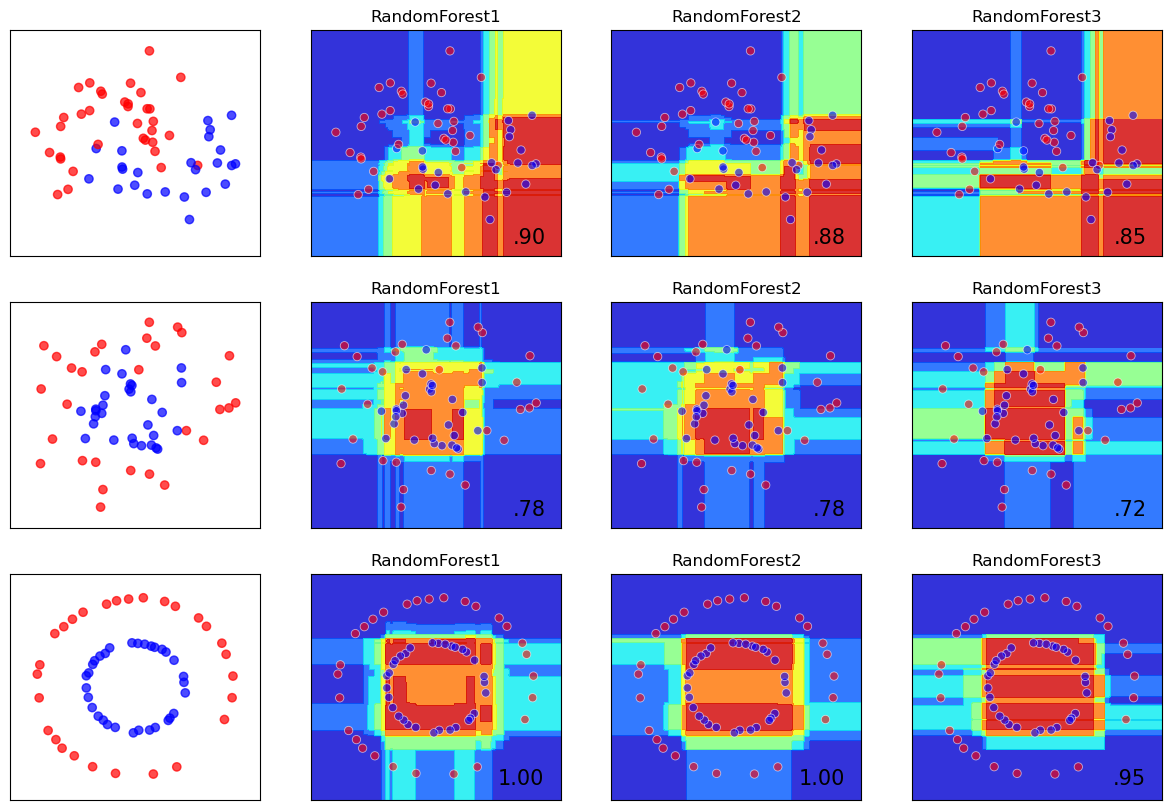

In [11]:
figure = plt.figure(figsize=(12, 10))
h = 0.02
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.jet
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(treeclassifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
    # and testing points
    #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, linearclassifiers):
        ax = plt.subplot(len(datasets), len(treeclassifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
        # and testing points
        #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   #alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()